<a href="https://colab.research.google.com/github/Dudukrop/Classifica-odeSentimentos_SpaCy/blob/main/Classifica%C3%A7%C3%A3odeSentimentos_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CARREGAMENTO DA BASE**

In [ ]:
!pip install spacy

In [ ]:
!python3 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [ ]:
base_dados = pd.read_csv('base_treinamento.txt', encoding='utf-8')
base_dados

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


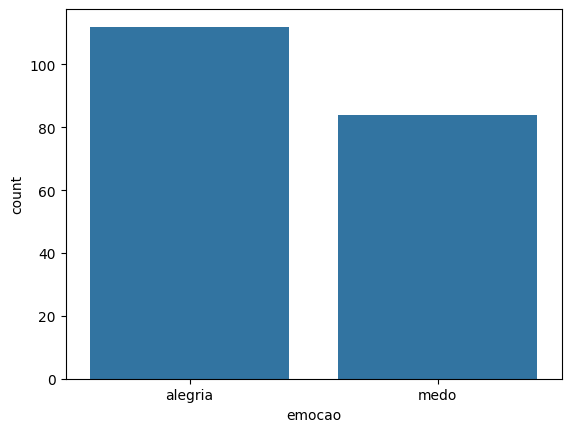

In [ ]:
sns.countplot(x=base_dados['emocao']);

# **PRÉ-PROCESSAMENTO**

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stopwords = STOP_WORDS
print(stopwords)

{'ela', 'puderam', 'ligado', 'foi', 'esse', 'estivemos', 'sem', 'vezes', 'sobre', 'seria', 'ser', 'perto', 'já', 'vez', 'deverá', 'me', 'conselho', 'sabe', 'podem', 'quer', 'sob', 'fui', 'minha', 'os', 'aqui', 'segundo', 'diante', 'assim', 'número', 'mas', 'local', 'oitava', 'minhas', 'mesmo', 'obrigado', 'longe', 'conhecida', 'cujo', 'dezoito', 'fazes', 'ambos', 'seus', 'bastante', 'vosso', 'embora', 'quinze', 'fazer', 'sim', 'próximo', 'possivelmente', 'oitavo', 'novo', 'daquele', 'veja', 'vós', 'e', 'tente', 'contudo', 'dezassete', 'novas', 'dois', 'ademais', 'estou', 'ele', 'fez', 'sete', 'neste', 'quanto', 'pode', 'nossas', 'também', 'usa', 'cedo', 'quatro', 'lá', 'temos', 'algo', 'nunca', 'desse', 'daquela', 'naquela', 'quieta', 'nos', 'vossas', 'fim', 'coisa', 'ter', 'oito', 'parte', 'vai', 'todos', 'eventual', 'estivestes', 'debaixo', 'tiveste', 'dos', 'faz', 'estive', 'à', 'outra', 'aí', 'cinco', 'próprio', 'maioria', 'pois', 'dá', 'posso', 'comprida', 'a', 'menos', 'que', 'gr

In [ ]:
pln = spacy.load('pt_core_news_sm')
pln

In [ ]:
def preprocessamento(texto):
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_.lower().strip())

  lista = [palavra for palavra in lista if palavra not in stopwords and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = preprocessamento(base_dados['texto'][0])
teste

'trabalho agradável'

# **LIMPEZA DOS TEXTOS**

In [ ]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados

,texto,emocao
0,trabalho agradável,alegria
1,gosto ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
...,...,...
191,chocado amedrontar assassinato brutal,medo
192,preciso afugentar ímpeto medo de o inferno,medo
193,político força afugentar amedrontar,medo
194,objetivo de isso amedrontar,medo


# **PROCESSAMENTO**

In [ ]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})
  base_dados_final.append([texto, dic.copy()])

In [ ]:
print(base_dados_final)

[['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}], ['gosto ficar em o aconchego', {'ALEGRIA': True, 'MEDO': False}], ['fiz adesão a o curso hoje', {'ALEGRIA': True, 'MEDO': False}], ['admirar', {'ALEGRIA': True, 'MEDO': False}], ['adorar', {'ALEGRIA': True, 'MEDO': False}], ['adorar cabelo macio', {'ALEGRIA': True, 'MEDO': False}], ['adorar cor de o olho', {'ALEGRIA': True, 'MEDO': False}], ['somo amável outro', {'ALEGRIA': True, 'MEDO': False}], ['sinto afeição', {'ALEGRIA': True, 'MEDO': False}], ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}], ['sinto completamente amar', {'ALEGRIA': True, 'MEDO': False}], ['amo', {'ALEGRIA': True, 'MEDO': False}], ['alívio', {'ALEGRIA': True, 'MEDO': False}], ['dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}], ['achar apaixoneir', {'ALEGRIA': True, 'MEDO': False}], ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}], ['sentir animar', {'ALEGRIA': True, 'MEDO': False}], ['sintar hoje', {'ALEGRIA': True, 'MEDO': False

In [ ]:
len(base_dados_final)

196

# **CLASSIFICADOR**

In [ ]:
from spacy.training import Example

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [ ]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.703735813498497}
{'textcat': 2.9593008599171355e-11}
{'textcat': 3.939206396513274e-12}
{'textcat': 1.0651202278022867e-12}
{'textcat': 3.8083269617548727e-13}
{'textcat': 1.6801377251810835e-13}
{'textcat': 7.992251202211878e-14}
{'textcat': 3.8255943213077147e-14}
{'textcat': 2.001720982327439e-14}
{'textcat': 1.157785623973336e-14}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.70373581e+00, 2.95930086e-11, 3.93920640e-12, 1.06512023e-12,
       3.80832696e-13, 1.68013773e-13, 7.99225120e-14, 3.82559432e-14,
       2.00172098e-14, 1.15778562e-14])

Text(0, 0.5, 'Erro')

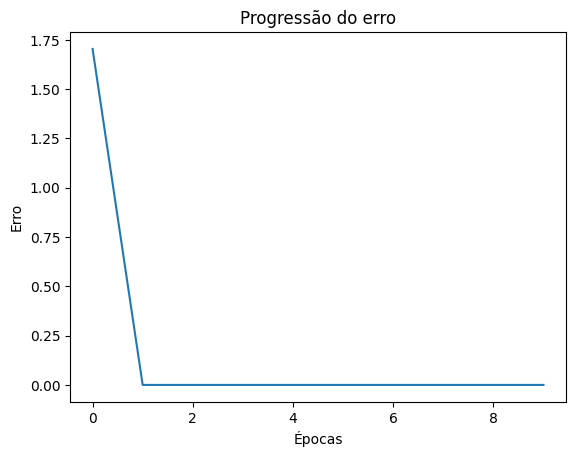

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [ ]:
modelo.to_disk("modelo")

# **TESTES**

In [ ]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [ ]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [ ]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor de o olho'

In [ ]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor de o olho

In [ ]:
previsao.cats

{'ALEGRIA': 1.0, 'MEDO': 3.626724165428641e-08}

In [ ]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 3.137268436148588e-07, 'MEDO': 0.9999996423721313}

# **AVALIAÇÃO**

In [ ]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 6.072527813927309e-09},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 6.314408551588713e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.919894909718778e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.8240246646428204e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.6231594674186454e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.0838921699350976e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.626724165428641e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.9172541594089125e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.4852790048157658e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.0846118669860516e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1412516265352224e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.902138529492504e-09},
 {'ALEGRIA': 1.0, 'MEDO': 5.854927653814457e-09},
 {'ALEGRIA': 1.0, 'MEDO': 2.7344325914668843e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 9.474965168010385e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.8857628347745958e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.431546127951606e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.376816826161644e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.3406051380115969e-08},
 {'ALEGRIA

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

# **AVALIAÇÃO NA BASE DE TESTE**

In [ ]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [ ]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [ ]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [ ]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [ ]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [ ]:
respostas_reais = base_dados_teste['emocao'].values

In [ ]:
accuracy_score(respostas_reais, previsoes_final)

0.6428571428571429

In [ ]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[33, 15],
       [15, 21]])